In [1]:
%matplotlib inline

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import re



In [109]:
df = pd.read_csv(r'C:\Users\Owner\PycharmProjects\NBA_Data_Dive\NBA_Data.csv', encoding='utf-8', comment='#', sep=',')



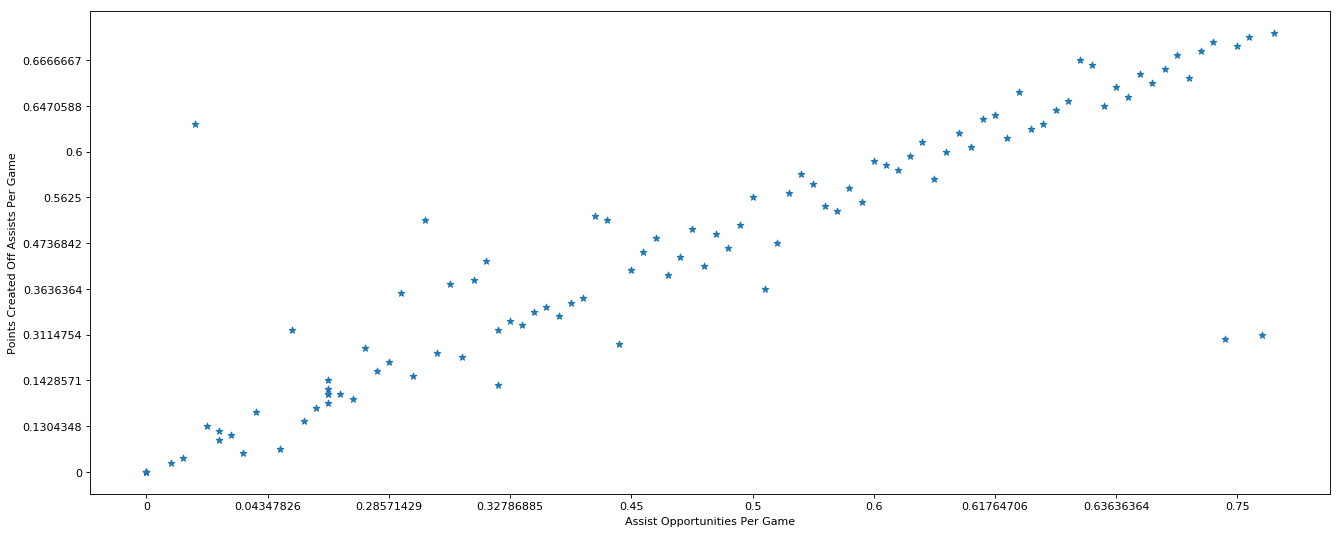

In [142]:
from scipy.stats import gaussian_kde

df_truncated = df.loc[0:100]
# x = df_truncated['MIN']
# y = df_truncated['PPG']
# 
# xy = np.vstack([x,y])
# z = gaussian_kde(xy)(xy)
# 
# fig, ax = plt.subplots()
# ax.scatter(x, y, c=z, s=100, edgecolor='')
# plt.show()

plt.figure(figsize=(20,8), dpi=80)
plt.scatter(df_truncated['AST_OPPS_PG'], df_truncated['AST_PTS_CRT_PG'], marker='*')

plt.xlabel('Assist Opportunities Per Game')
plt.ylabel('Points Created Off Assists Per Game')
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
plt.show()



In [180]:
y=df['AST_PTS_CRT_PG'].values
print(y[0])
#y.rows
y = y[1:]
print(y[0])
y.shape

Points Created Off Assists Per Game
4.030303


(611,)

In [181]:
X=df['AST_OPPS_PG'].values

X = X[1:, np.newaxis]

X.shape

(611, 1)

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 



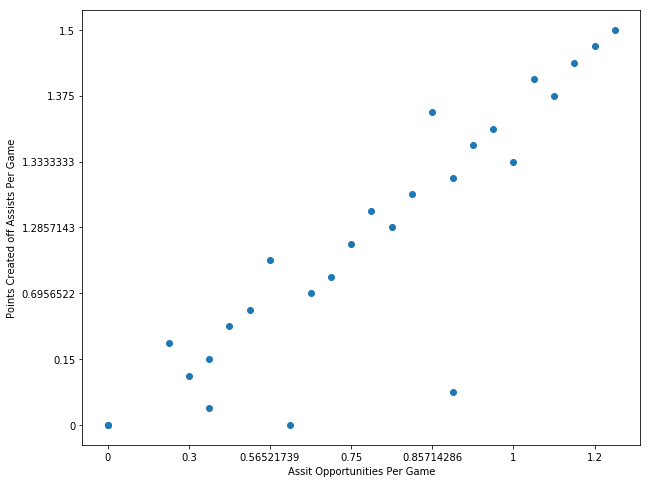

In [183]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[400:500], y_train[400:500])
plt.xlabel('Assit Opportunities Per Game')
plt.ylabel('Points Created off Assists Per Game')
plt.locator_params(axis='x', nbins=7)
plt.locator_params(axis='y', nbins=7)



In [197]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Corefficients: %0.2f' % lr.coef_)
print('Intercept: %0.2f' % lr.intercept_)

Corefficients: 1.19
Intercept: -0.07


In [198]:
print('R2 Score: %0.3f' % lr.score(X_test, y_test) )


R2 Score: 0.983


In [ ]:
print(X_train)


dtype('O')

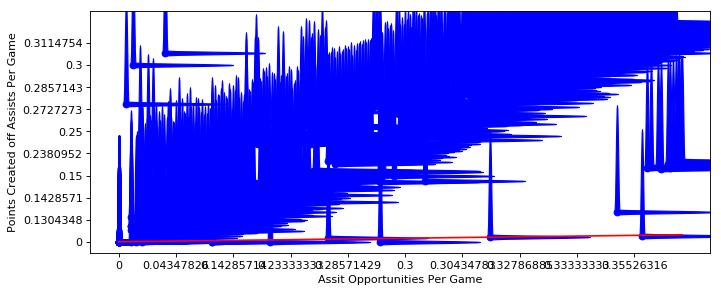

In [217]:
min_pred = float(X_train.min())*lr.coef_ + lr.intercept_
max_pred = float(X_train.max())*lr.coef_ + lr.intercept_

plt.figure(figsize=(10,4), dpi=80)
plt.scatter(X_train, y_train, c='blue', marker='o')
plt.plot([X_train.min(), X_train.max()], [min_pred, max_pred], color='red')
plt.xlabel('Assit Opportunities Per Game')
plt.ylabel('Points Created off Assists Per Game')
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
plt.show()